In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
characters = pd.read_csv('lotr_characters.csv', encoding='latin1')
battles = pd.read_csv('lotr_battles.csv', encoding='latin1')

display(characters.head())
display(battles.head())

,CharacterID,Character,Race,Alignment,Home
0,1,Frodo Baggins,Hobbit,Good,The Shire
1,2,Aragorn,Man,Good,Gondor
2,3,Legolas,Elf,Good,Woodland Realm
3,4,Gimli,Dwarf,Good,Lonely Mountain
4,5,Gandalf,Maia,Good,Valinor


,Battle ID,Battle,Movie,Location,Winner,MajorParticipants
0,1,Battle of HelmÕs Deep,The Two Towers,Rohan,Good,"Aragorn, Legolas, Gimli"
1,2,Battle of Pelennor Fields,The Return of the King,Gondor,Good,"owyn, Aragorn, Gandalf"
2,3,Battle of the Black Gate,The Return of the King,Mordor,Good,"Aragorn, Gandalf"
3,4,Moria Escape,The Fellowship of the Ring,Moria,Evil,"Gandalf, Balrog"
4,5,Amon Hen,The Fellowship of the Ring,Gondor,Evil,"Boromir, Uruk-hai"


In [5]:
conn = sqlite3.connect(':memory:')

characters.to_sql('characters', conn, index=False, if_exists='replace')
battles.to_sql('battles', conn, index=False, if_exists='replace')

print("In-memory SQLite database created with tables: characters, battles")

In-memory SQLite database created with tables: characters, battles


/var/folders/5z/l0w647j50cb31pfqc2q799_c0000gn/T/ipykernel_75917/2012863614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=char_race, x='Race', y='Character', palette='viridis')


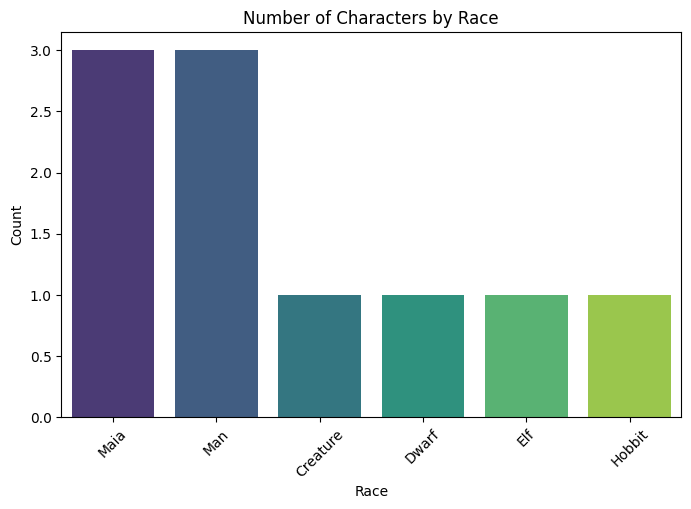

<Figure size 640x480 with 0 Axes>

In [10]:
char_race = characters.groupby('Race')['Character'].count().reset_index().sort_values(by='Character', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=char_race, x='Race', y='Character', palette='viridis')
plt.title('Number of Characters by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

plt.savefig('characters_by_race.png', bbox_inches='tight')

plt.show()

/var/folders/5z/l0w647j50cb31pfqc2q799_c0000gn/T/ipykernel_75917/3357634652.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=battles_movie, x='Movie', y='Battle', palette='magma')


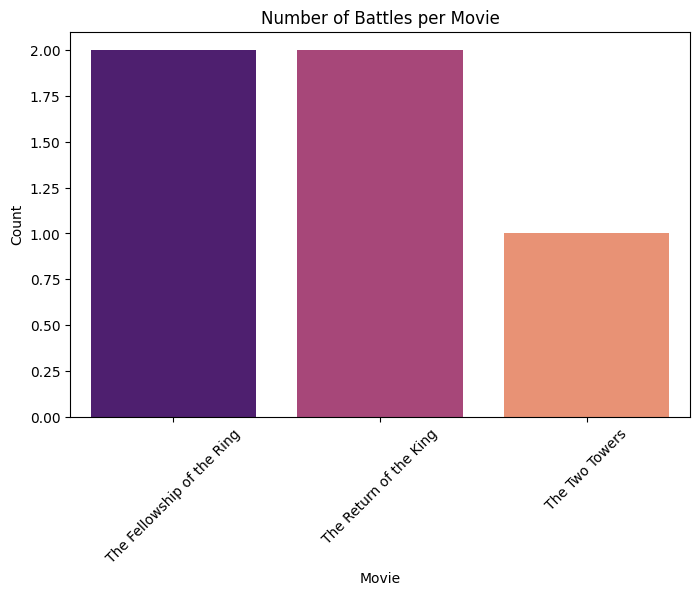

<Figure size 640x480 with 0 Axes>

In [11]:
# Count battles per movie
battles_movie = battles.groupby('Movie')['Battle'].count().reset_index().sort_values(by='Battle', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=battles_movie, x='Movie', y='Battle', palette='magma')
plt.title('Number of Battles per Movie')
plt.ylabel('Count')
plt.xlabel('Movie')
plt.xticks(rotation=45)
plt.show()

# Save as PNG
plt.savefig('battles_by_movie.png', bbox_inches='tight')

plt.show()


/var/folders/5z/l0w647j50cb31pfqc2q799_c0000gn/T/ipykernel_75917/162646189.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=char_counts_df.head(10), x='Character', y='Appearances', palette='coolwarm')
/Users/shavellythen/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


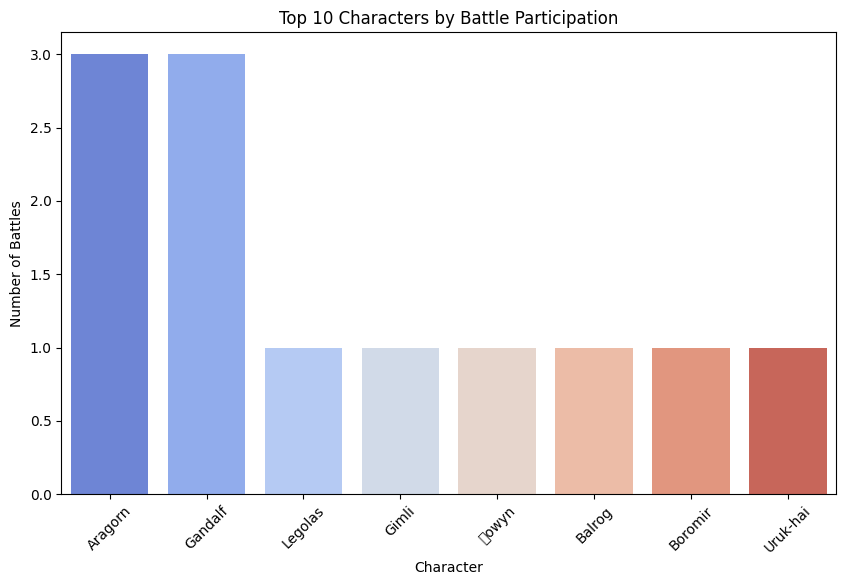

<Figure size 640x480 with 0 Axes>

In [12]:
# Count appearances of main characters (MajorParticipants column may have multiple characters separated by commas)
# First, split the strings and count occurrences
from collections import Counter

# Split participants by comma and flatten list
all_chars = [char.strip() for participants in battles['MajorParticipants'] for char in participants.split(',')]
char_counts = Counter(all_chars)

# Convert to DataFrame for plotting
char_counts_df = pd.DataFrame(char_counts.items(), columns=['Character', 'Appearances']).sort_values(by='Appearances', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=char_counts_df.head(10), x='Character', y='Appearances', palette='coolwarm')
plt.title('Top 10 Characters by Battle Participation')
plt.ylabel('Number of Battles')
plt.xlabel('Character')
plt.xticks(rotation=45)
plt.show()

# Save as PNG
plt.savefig('top_characters_battles.png', bbox_inches='tight')

plt.show()